In [2]:
import codecs
import re
import numpy as py
import csv
import operator
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import cross_validation
import math

D:\jupyter\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1

In [7]:
network = open("network.txt", "w") 
ml=[]
id = 0
print("start")
network.truncate()
with open ('actor_movies.txt',errors='ignore') as actor:
    for line in actor.readlines():
        word = line.split("\t\t")
        count=0
        for i in range(1,len(word)):
            if word[i]!="\n":
                count=count+1
        if count < 11:
            continue
        newword={}
        for i in range(1,len(word)):
            if word[i]!='\n':
                word[i]=word[i].rstrip()
                #if word[i]!="\n": #if it is a movie name or a \n
                if re.search(r'[(]',word[i]): #some movies do not have any information after, if so go directly to have the name
                    m=(re.search(r'.+(?=\t?[(])', word[i]))
                    m1=word[i]
                    while re.search(r'.+(?=\t?[(])',m.group(0))!=None: 
                        m1=m
                        m=re.search(r'.+(?=\t?[(])',m.group(0))
                        #print(m.group(0))
                    if type(m1)==str:
                        newword[i]=m1
                    else:
                        newword[i]=m1.group(0)
                        #print(newword[i])
                else:    
                    newword[i]=word[i]
                        #print(newword[i])
                    
        seen = set()
        result = []
        for i in range(1,len(newword)+1):
            a=re.sub(r'[^\w]','',newword[i])
            if a not in seen:
                seen.add(re.sub(r'[^\w]','',newword[i]))
                result.append(word[i])  
                    
        if len(result) < 10:
            continue
            
        for wa in seen:
            ml.append(wa)
        
        network.write(word[0])
        network.write("\t\t")
        for a in seen:
            network.write(a)
            network.write("\t\t")          
        
        network.write("\n")
        id=id+1
actor.close
actorN=id

id=0

with open ('actress_movies.txt',errors='ignore') as actress:
    for line in actress.readlines():
        word = line.split("\t\t")
        count=0
        for i in range(1,len(word)):
            if word[i]!="\n":
                count=count+1
        if count < 11:
            continue
        newword={}
        for i in range(1,len(word)):
            if word[i]!='\n':
                word[i]=word[i].rstrip()
                #if word[i]!="\n": #if it is a movie name or a \n
                if re.search(r'[(]',word[i]): #some movies do not have any information after, if so go directly to have the name
                    m=(re.search(r'.+(?=\t?[(])', word[i]))
                    m1=word[i]
                    while re.search(r'.+(?=\t?[(])',m.group(0))!=None: 
                        m1=m
                        m=re.search(r'.+(?=\t?[(])',m.group(0))
                        #print(m.group(0))
                    if type(m1)==str:
                        newword[i]=m1
                    else:
                        newword[i]=m1.group(0)
                        #print(newword[i])
                else:    
                    newword[i]=word[i]
                        #print(newword[i])

        seen = set()
        result = []
        for i in range(1,len(newword)+1):
            a=re.sub(r'[^\w]','',newword[i])
            if a not in seen:
                seen.add(re.sub(r'[^\w]','',newword[i]))
                result.append(word[i])  
                    
        if len(result) < 10:
            continue
            
        for wa in seen:
            ml.append(wa)
        

        network.write(word[0])
        network.write("\t\t")
        for a in seen:
            network.write(a)
            network.write("\t\t")  
        network.write("\n")
        id=id+1
actress.close
actressN=id

network.close()

start


## 2

In [3]:
id_movie = dict()#give actor return movie
movie_id = dict()#give movie return actor
id_nu=dict()#give actor return actor index
count=0
with open('network.txt') as idmovie:
    for line in idmovie.readlines():
        
        word = line.strip().split("\t\t")
        for movie in word[1:]:
            if word[0] not in id_movie:
                id_movie[word[0]] = list()
                id_movie[word[0]].append(movie)
            else:
                id_movie[word[0]].append(movie)
        count=count+1        
        id_nu[word[0]]=count
        
        
with open('network.txt') as movieid:
    for line in movieid.readlines():
        word = line.strip().split("\t\t")
        for movie in word[1:]:
            if movie not in movie_id:
                movie_id[movie] = list()
                movie_id[movie].append(word[0])
            else:
                movie_id[movie].append(word[0])


In [67]:
len(movie_id)

457905

In [68]:
len(id_nu)

101122

In [11]:
edge_weight=open("edge_weight.txt", "w") #for the use of R file
edge_number=0
for i in id_movie:
    i_weight=dict()
    le=len(id_movie[i])
    for j in id_movie[i]:
        for k in movie_id[j]:
            if k != i:
                if k not in i_weight:
                    edge_number+=1
                    i_weight[k]=list()
                    i_weight[k].append(1)
                    weight=float(1)/le
                    i_weight[k].append(weight)
                else:
                    i_weight[k][0]+=1
                    weight=float(i_weight[k][0])/le
                    i_weight[k][1]=weight
    for item in i_weight:
        weight=str(i_weight[item][1])
        weight = weight.strip()
        id1=id_nu[i]
        id2=id_nu[item]
        if str(id1) and str(id2) and weight:
            edge_weight.write(str(id1)+"\t\t"+str(id2)+"\t\t"+weight+"\n")# jump to another line
edge_weight.close()

## 3

In [28]:
find_pair=['Cruise, Tom','Watson, Emma (II)','Clooney, George', 'Hanks, Tom', 'Johnson, Dwayne (I)','Depp, Johnny','Smith, Will (I)', 'Streep, Meryl','DiCaprio, Leonardo','Pitt, Brad']

actor_pair=dict()
for i in find_pair:
        pair=dict()
        movie_name=id_movie[i]
        for j in movie_name:
            actors=movie_id[j]
            for k in actors:
                if k !=i:
                    if k not in pair:
                        pair[k]=1
                    else:
                        pair[k]+=1
        print(max(pair.items(), key=operator.itemgetter(1))[0],max(pair.items(), key=operator.itemgetter(1))[1])        
        actor_pair[i]=max(pair.items(), key=operator.itemgetter(1))[0]        

Kidman, Nicole 11
Radcliffe, Daniel 13
Damon, Matt 8
Allen, Tim (I) 8
Austin, Steve (IV) 16
Bonham Carter, Helena 8
Jones, Tommy Lee 4
Kline, Kevin (I) 6
Scorsese, Martin 5
Clooney, George 7


In [31]:
ew=open("edge_weight.txt")
lines=ew.readlines()
for i in find_pair:
    j=actor_pair[i]
    w=len(set(id_movie[i])&set(id_movie[j]))/len(id_movie[i])
    print(w)
           

0.1746031746031746
0.52
0.11940298507462686
0.10126582278481013
0.20512820512820512
0.08163265306122448
0.08163265306122448
0.061855670103092786
0.10204081632653061
0.09859154929577464


## 4

In [32]:
top_10=[76983,59399,24891,5872,40894,47530,36345,28904,16268,44724]

In [35]:
## from r file the indegree of previous actrors
in_degree_1=[14552,7514,13452,6300,12760,10884,5042,5450,5620,10706 ]

In [38]:
c=0
for i in top_10:   
    print(str(list(id_nu.keys())[i])+'\t\t'+str(len(id_movie[list(id_nu.keys())[i]]))+"\t\t"+str(in_degree_1[c]))
    c+=1

Fluegel, Darlanne		17		14552
Tate, Larenz		19		7514
Harris, Stacy (I)		28		13452
Blumberg, Jeff		17		6300
Miller, Hugh (II)		29		12760
Phelps, Peter (I)		25		10884
Lowery, Robert		130		5042
Jericho, Chris (I)		24		5450
Downey Jr., Robert		89		5620
O'Connor, Harry (I)		17		10706


# 5

In [34]:
for i in find_pair:
    print(id_nu[i])

13060
99512
11535
24547
29131
15178
56512
96436
15544
47947


In [39]:
## from r file the indegree of previous actrors
in_degree_2=[3116,862,2970,3912,2516,4120,2452,3022,2446,3288]

In [42]:
c=0
for i in find_pair:   
    print(str(i)+'\t\t'+str(len(id_movie[i]))+"\t\t"+str(in_degree_2[c]))
    c+=1

Cruise, Tom		63		3116
Watson, Emma (II)		25		862
Clooney, George		67		2970
Hanks, Tom		79		3912
Johnson, Dwayne (I)		78		2516
Depp, Johnny		98		4120
Smith, Will (I)		49		2452
Streep, Meryl		97		3022
DiCaprio, Leonardo		49		2446
Pitt, Brad		71		3288


## 6

In [4]:
movie_nu=dict() #give movie return movie index
nu_id=dict() #give movie index return actors
nu_movie=dict() # give movie index return movie
count=0
for m in movie_id:
    if len(movie_id[m])>=5:
        count+=1
        movie_nu[m]=count
        nu_id[count]=movie_id[m] #for movie actors>5
        nu_movie[count]=m

In [7]:
mew=open("movie_edge_weight.txt", "w") #for the use of R file
for i in movie_nu : # mvi is the movie index
    i_weight=set()
    for j in movie_id[i]: # actor is the actor index in mvi
                             # actorplayMV is the list of movie names actor in
        for k in id_movie[j]:#mvj is the movie name
            if k not in movie_nu:
                continue
            if movie_nu[k]>movie_nu[i]:
                if k not in i_weight:
                    i_weight.add(k)
                    union=len((set(nu_id[movie_nu[k]]) & set(nu_id[movie_nu[i]])))
                    if union<=0:
                        continue
                    w=union/len(set(nu_id[movie_nu[k]])|set(nu_id[movie_nu[i]]))
                    mew.write(str(movie_nu[i])+"\t\t"+str(movie_nu[k])+"\t\t"+str(w)+"\n")
mew.close()

## 7

In [5]:
movie_genre=dict()
with open("movie_genre.txt",errors='ignore') as mg:
    for line in mg.readlines():
        word=line.split("\t\t")
        word[0]=re.sub(r'[^\w]','',word[0])
        movie_genre[word[0]]=word[1]
mg.close()        

In [6]:
movie_community=dict()
with open("movie_community.txt") as mc:
    for line in mc.readlines():
        line=line.rstrip()
        if re.search(r'\$',line):
            i=line
            movie_community[line]=list()
            continue
        movie_community[i].append(line)    
            

In [7]:
indicator=['$1','$2',"$3",'$4','$5','$6','$7','$8','$9','$10']
total=dict()
for i in indicator:
    com=dict()
    for j in movie_community[i]:
        mv=nu_movie[float(j)]
        if re.search('SUSPEND',mv):
            m=re.search(r'.+(?=SUSPEND)',mv)
            mv=m.group(0)
        if mv in movie_genre:
            ge=movie_genre[mv].strip()
            if ge not in com:
                 com[ge]=1
            else:
                 com[ge]+=1
    total[i]=com        

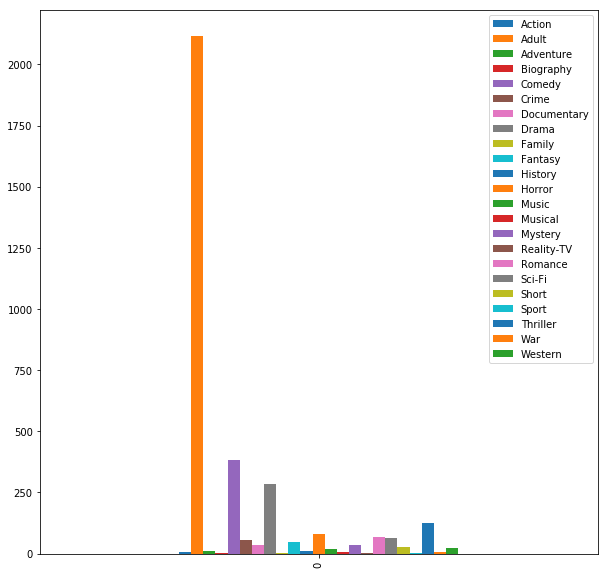

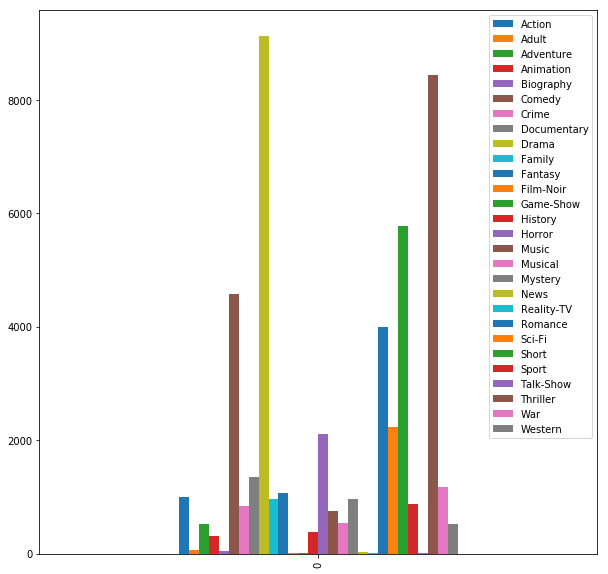

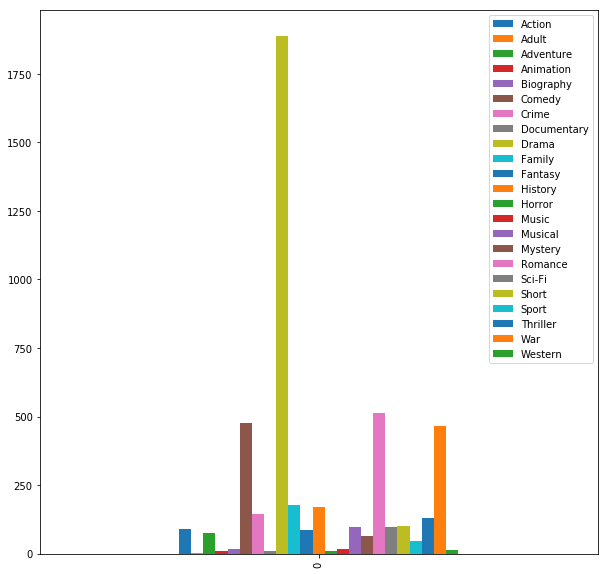

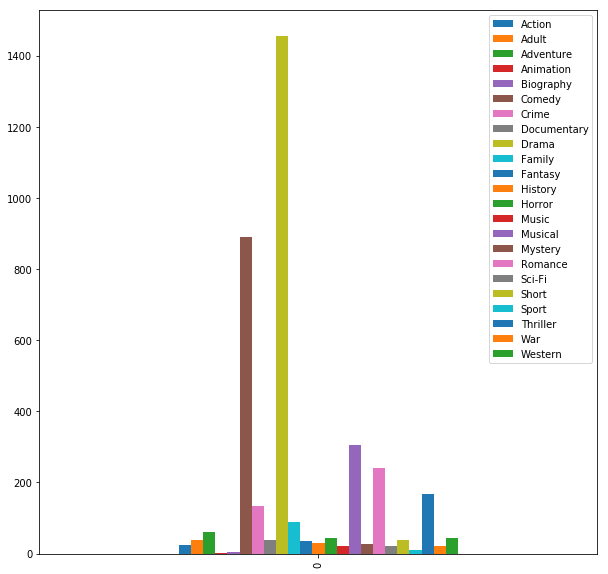

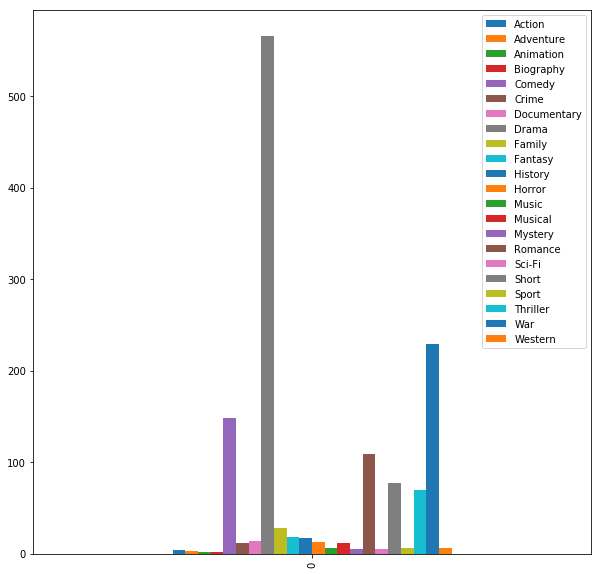

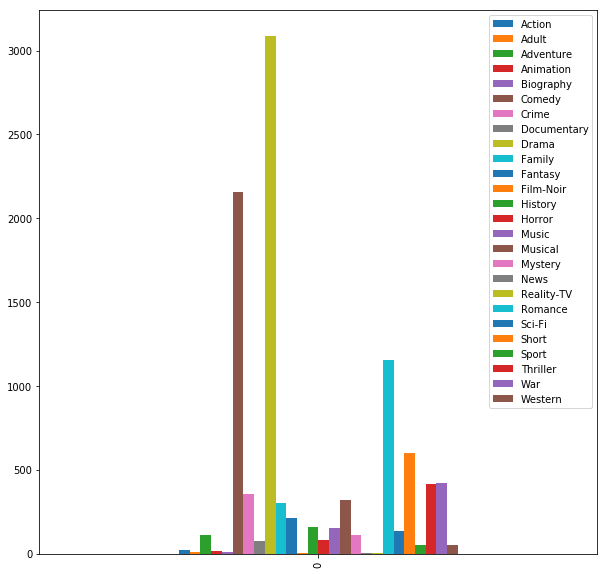

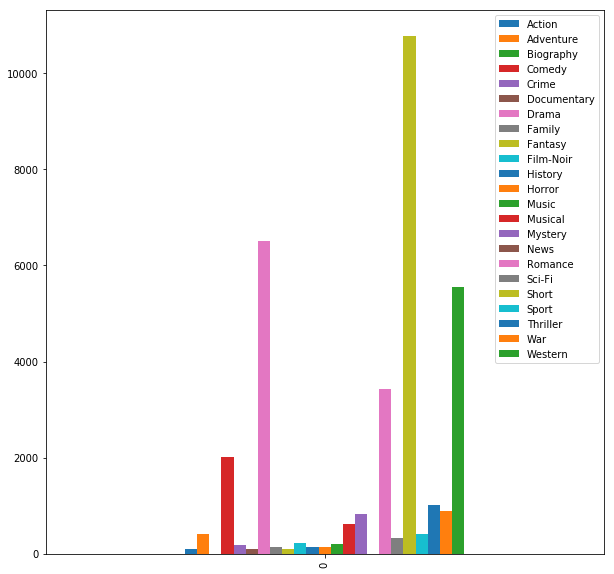

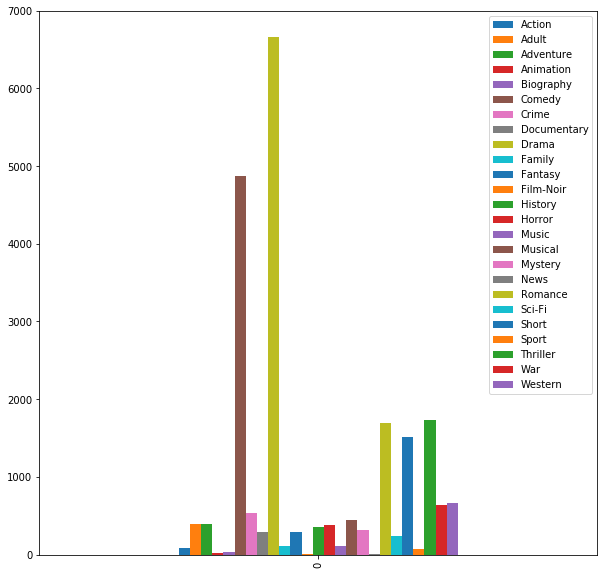

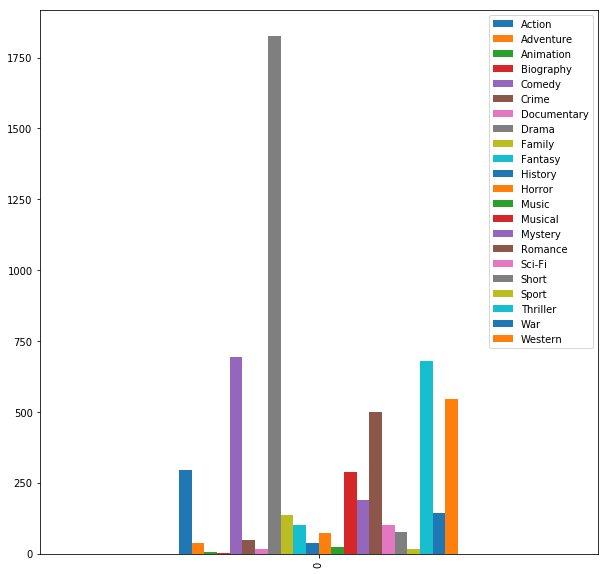

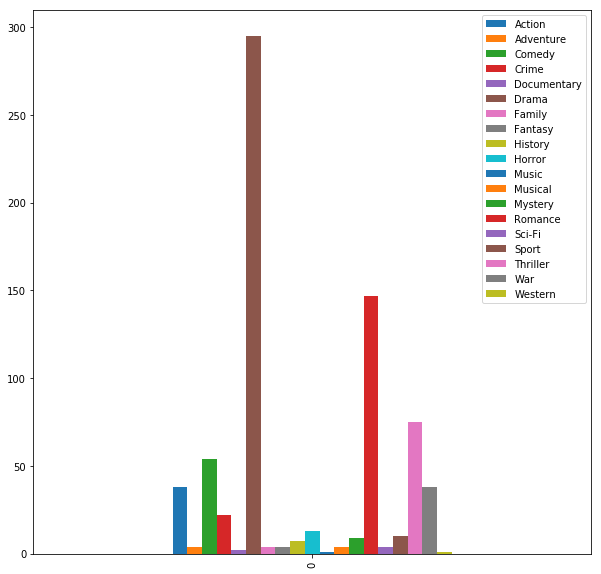

In [291]:
for i in indicator:
    b = (total[i].values())
    c = list(map(int,b))
    df = pd.DataFrame([total[i]])
    df.plot(kind = 'bar',figsize=(10,10))

## 8(a)
1 adult
7 short
other drama

most popular drama


## 8(b)

In [303]:
genre_count=dict()
for i in nu_movie:
    mv=nu_movie[i]
    if mv in movie_genre:
        gn=movie_genre[mv]
        if gn not in genre_count:
            genre_count[gn]=1
        else:
            genre_count[gn]+=1

In [308]:
count=0
q_i=dict()
for i in genre_count:
    count=count+genre_count[i]
for i in genre_count:
    ii=i.strip()
    q_i[ii]=genre_count[i]/count

In [329]:
score=dict()
for i in indicator:
    i_weight=dict()
    b = (total[i].values())
    temp = sum(list(map(int,b)))
    for j in total[i]:
        i_weight[j]=py.log(total[i][j])*(total[i][j])/temp/q_i[j]
    score[i]=i_weight    

In [341]:
for i in indicator:
    max = 0
    for j in score[i]:
        if max < score[i][j]:
            max = score[i][j]
            max_name=j
    print(i,max_name,max)        

$1 Adult 309.3476025312411
$2 Thriller 17.651398453834187
$3 War 21.41333831425675
$4 Musical 22.756979895939896
$5 War 32.36809404311898
$6 Comedy 13.388951533927376
$7 Western 32.17244597031808
$8 Comedy 15.335920774016149
$9 Musical 13.733286481002493
$10 Romance 9.385654413854407


## 8(c)

In [347]:
m8c=['101515', '101514', '101516' ,'101517', '101518' ,'101519' ,'101520' ,'101521', '101522', '101523', '101864' ,'101865', '151138']

In [361]:
with open("fs30.txt",'w') as fs30:
    for i in m8c:
        fs30.write(i+"\t\t")
        for j in nu_id[int(i)]:
            fs30.write(str(j)+"\t\t")
        fs30.write("\n")    
    
fs30.close()    

In [384]:
mfs30=dict()
for i in m8c:
    mv=nu_movie[int(i)]
    if re.search('SUSPEND',mv):
        m=re.search(r'.+(?=SUSPEND)',mv)
        mv=m.group(0)
    if mv in movie_genre:
        ge=movie_genre[mv].strip()
        if ge not in mfs30:
            mfs30[ge]=1
        else:
             mfs30[ge]+=1

In [385]:
mfs30

{'Short': 2, 'Sport': 1, 'Thriller': 10}

In [387]:
fs30score=dict()
b = (mfs30.values())
temp = sum(list(map(int,b)))
for j in mfs30:
    fs30score[j]=py.log(mfs30[j])*(mfs30[j])/temp/q_i[j]


In [388]:
fs30score

{'Short': 0.9243120432025814, 'Sport': 0.0, 'Thriller': 19.529033785208668}

## 9

In [5]:
movie_rating=dict()
with open("movie_rating.txt",errors="ignore") as mr:
       for line in mr.readlines():
            word=line.split("\t\t")
            word[0]=re.sub(r'[^\w]','',word[0])
            movie_rating[word[0]]=word[1]
    

In [48]:
m_t_r=['BatmanvSupermanDawnofJustice2016','MissionImpossibleRogueNation2015','Minions2015']

In [49]:
# for the use in r
print(movie_nu[m_t_r[0]])
print(movie_nu[m_t_r[1]])
print(movie_nu[m_t_r[2]])

9980
37745
76343


In [50]:
neighbors9=dict()
index=['m1','m2','m3']
with open("neighbors9.txt",'r') as n9:
    for line in n9.readlines():
        line = line.strip()
        if re.search(r'm',line):
            i=line
            neighbors9[line]=list()
            continue
        neighbors9[i].append(line)    

In [51]:
in_rating=dict()
for i in index:
    com=dict()
    for j in neighbors9[i]:
        if nu_movie[int(j)] in movie_rating:
            r=movie_rating[nu_movie[int(j)]]
            if r not in com:
                com[r]=1
            else:
                com[r]+=1
    in_rating[i]=com       

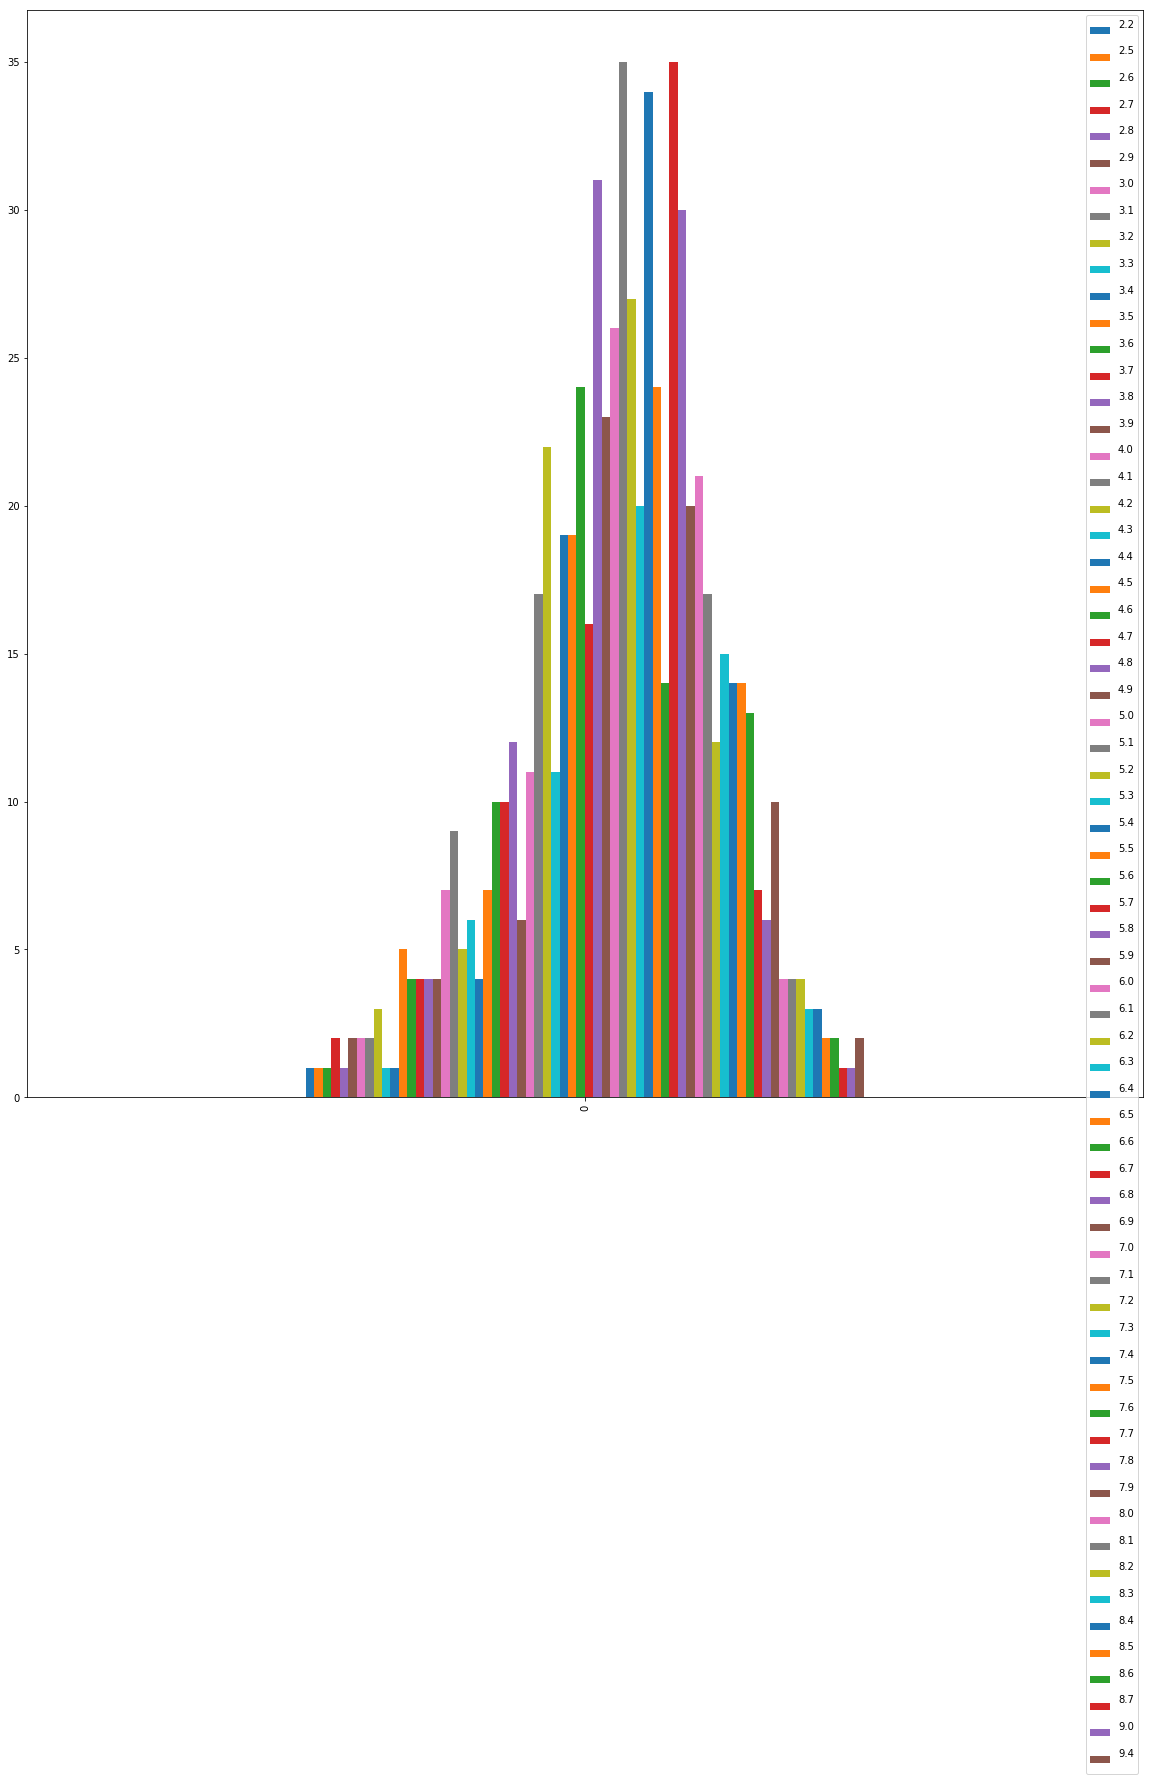

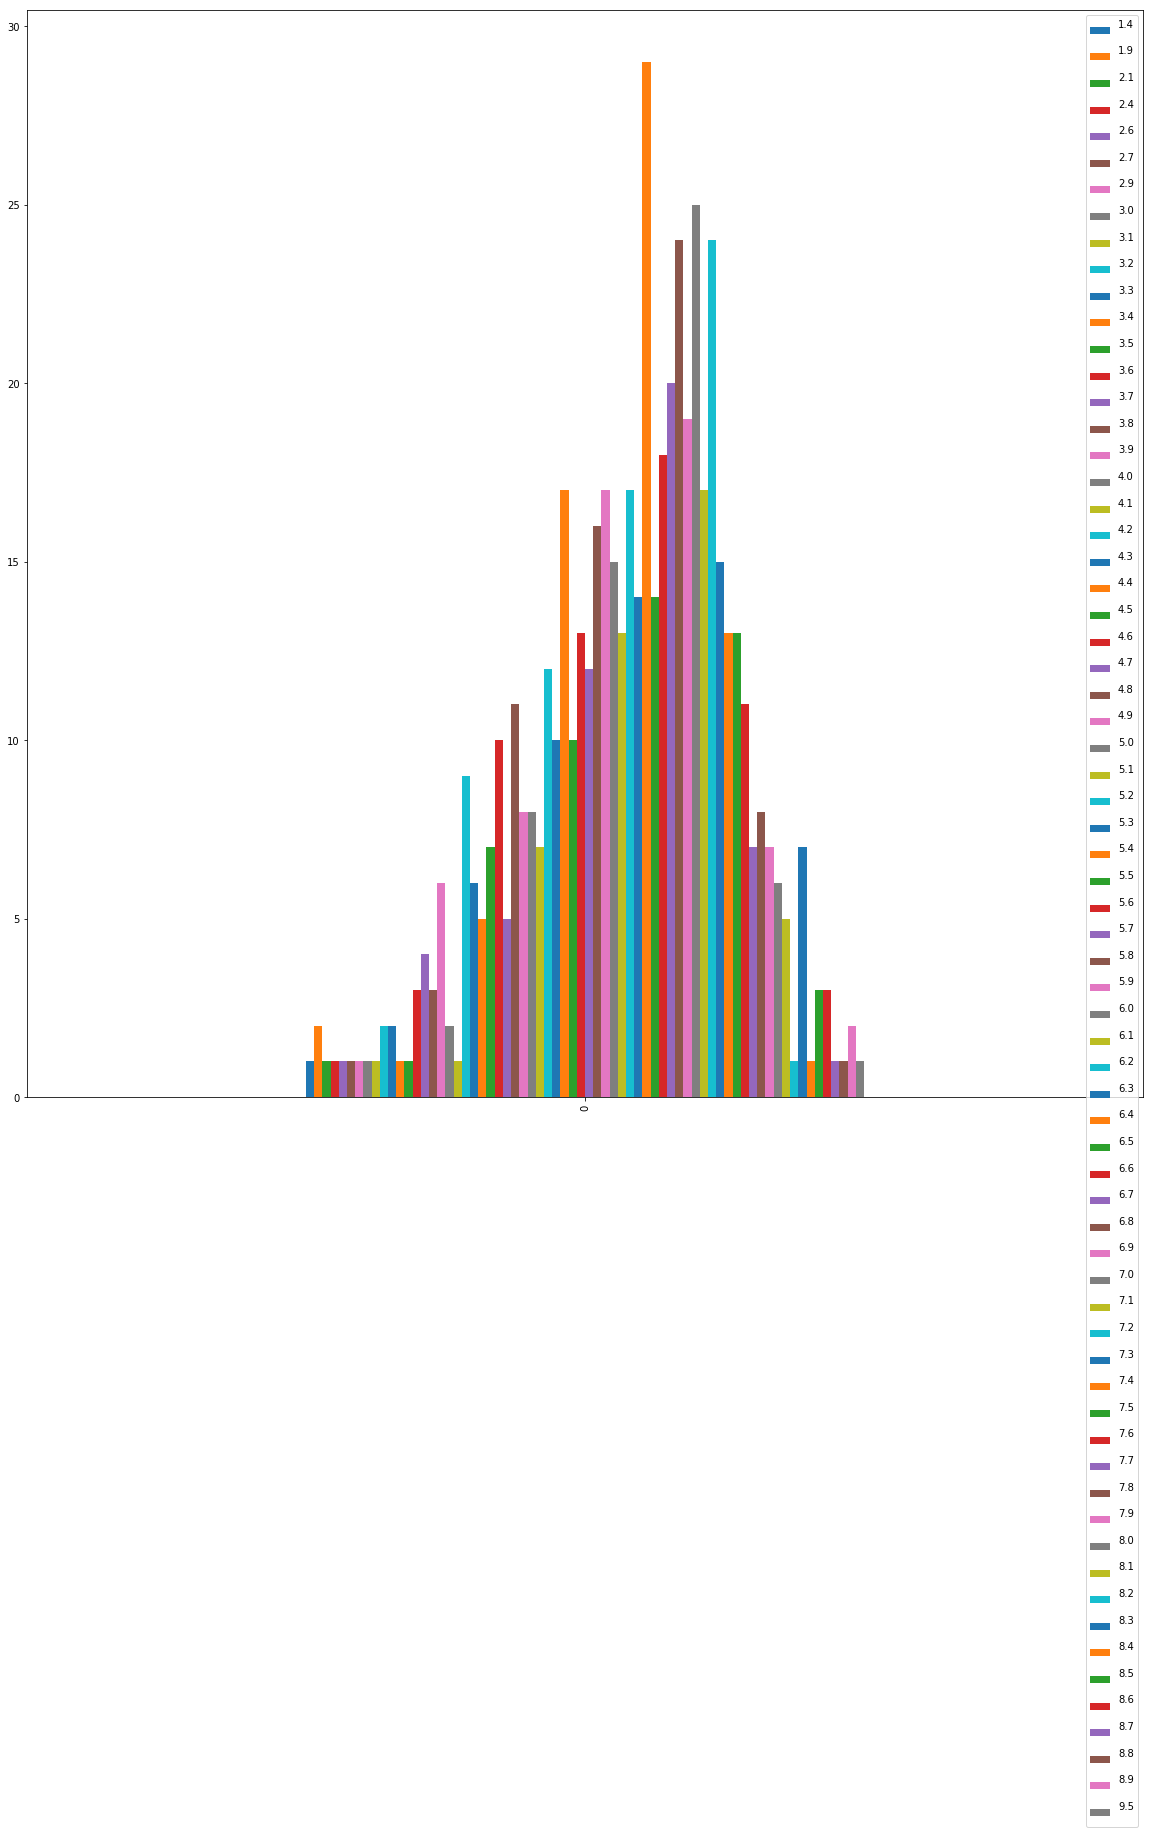

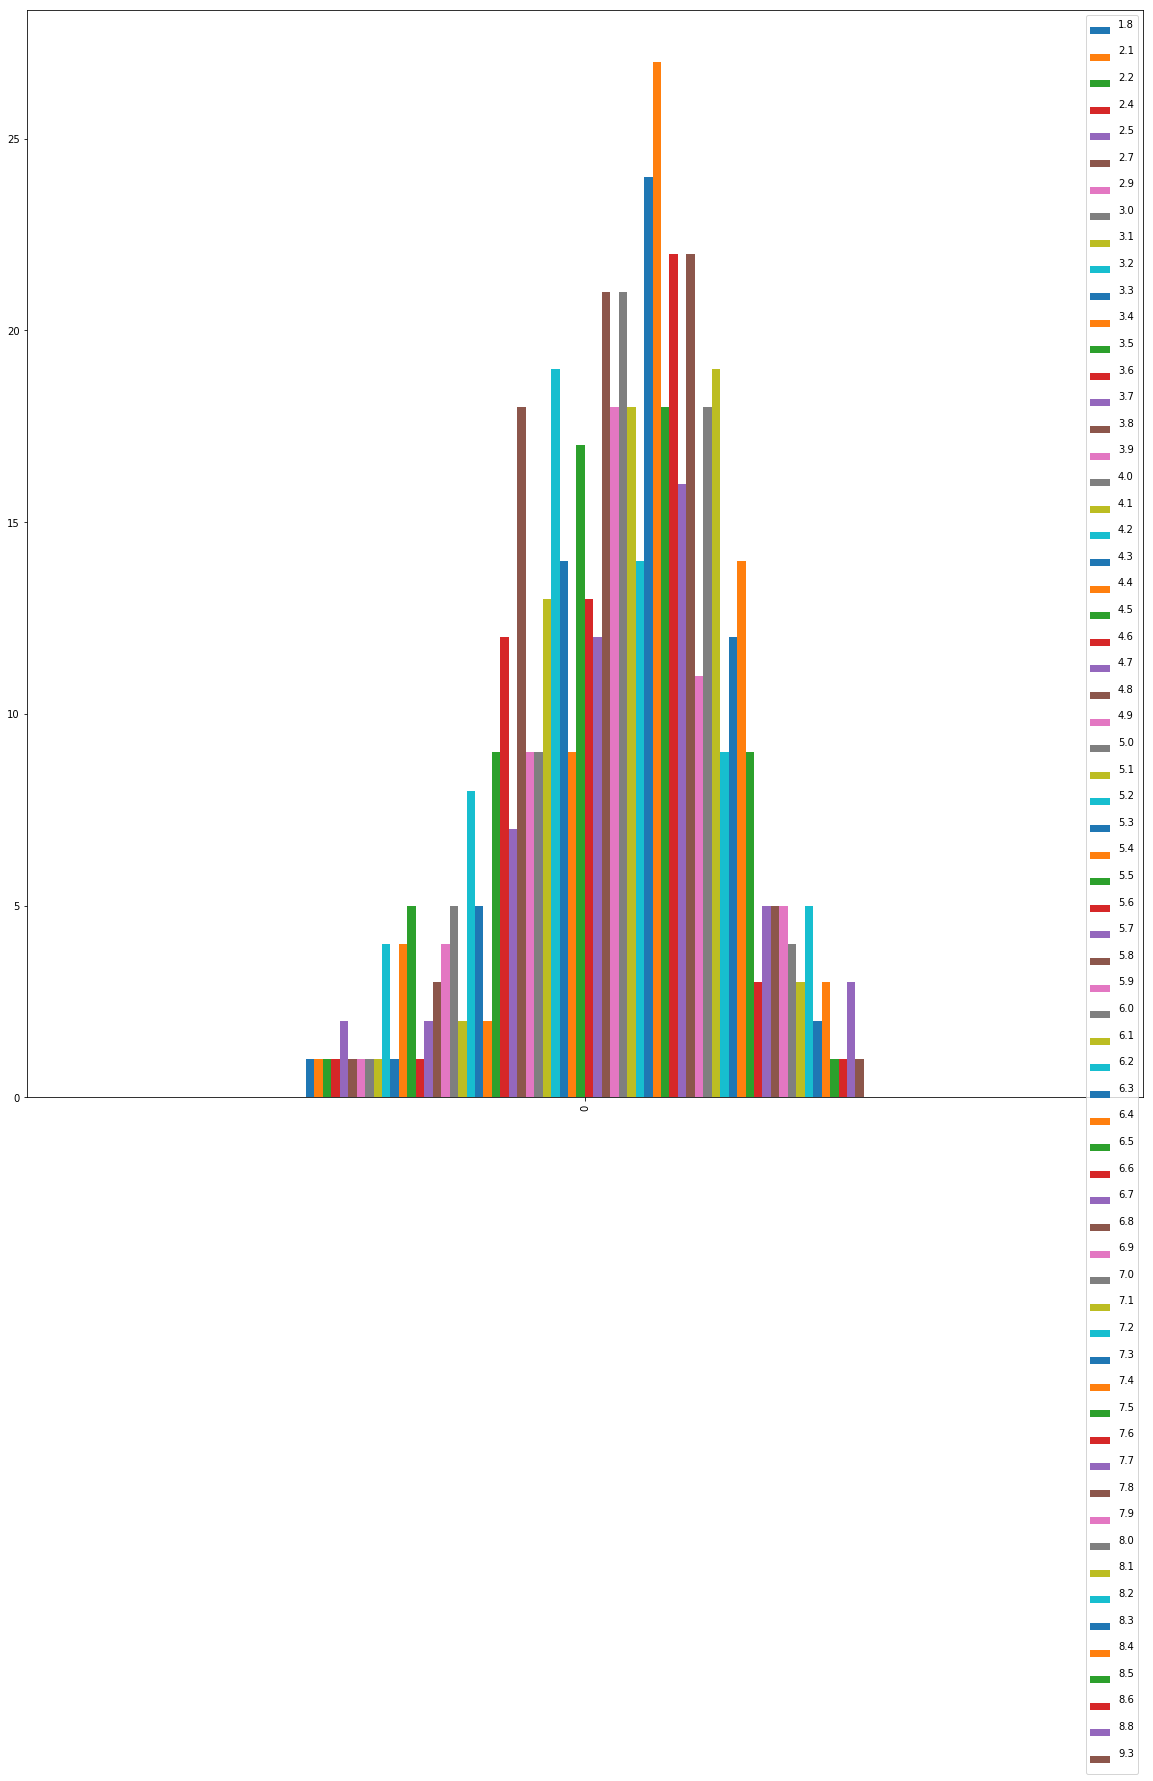

In [52]:
for i in index:
    b = (in_rating[i].values())
    c = list(map(int,b))
    df = pd.DataFrame([in_rating[i]])
    df.plot(kind = 'bar',figsize=(20,20))

In [53]:
for i in index:
    b = 0
    for j in in_rating[i]:
        a = float(j.strip())
        b = b + a*(in_rating[i][j])
    avg = b/sum(list(in_rating[i].values()))
    print(avg)
    

6.058872077028886
6.188811188811191
5.980385288966726


In [54]:
len(in_rating['m1'])

66

## 10

In [55]:
neighbors10=dict()
index=['m1','m2','m3']
with open("neighbors10.txt",'r') as n10:
    for line in n10.readlines():
        line = line.strip()
        if re.search(r'm',line):
            i=line
            neighbors10[line]=list()
            continue
        neighbors10[i].append(line)   

In [56]:
in_rating10=dict()
for i in index:
    com=dict()
    for j in neighbors10[i]:
        if nu_movie[int(j)] in movie_rating:
            r=movie_rating[nu_movie[int(j)]]
            if r not in com:
                com[r]=1
            else:
                com[r]+=1
    in_rating10[i]=com    

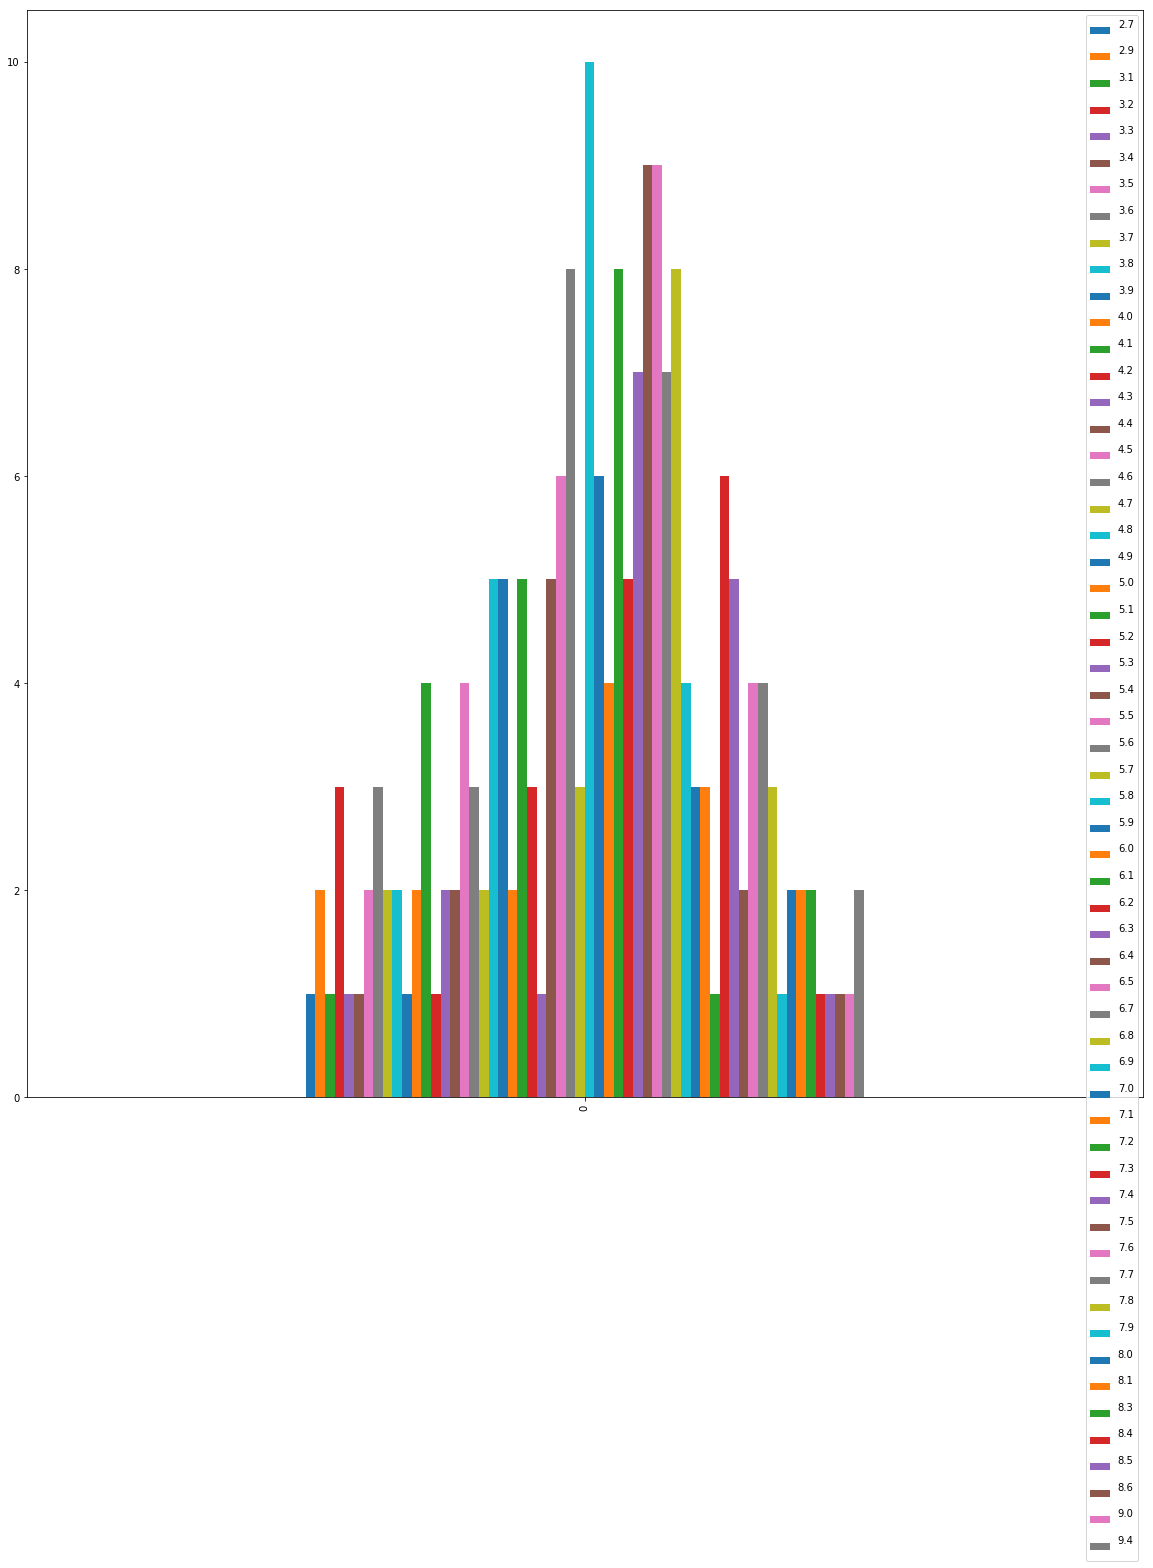

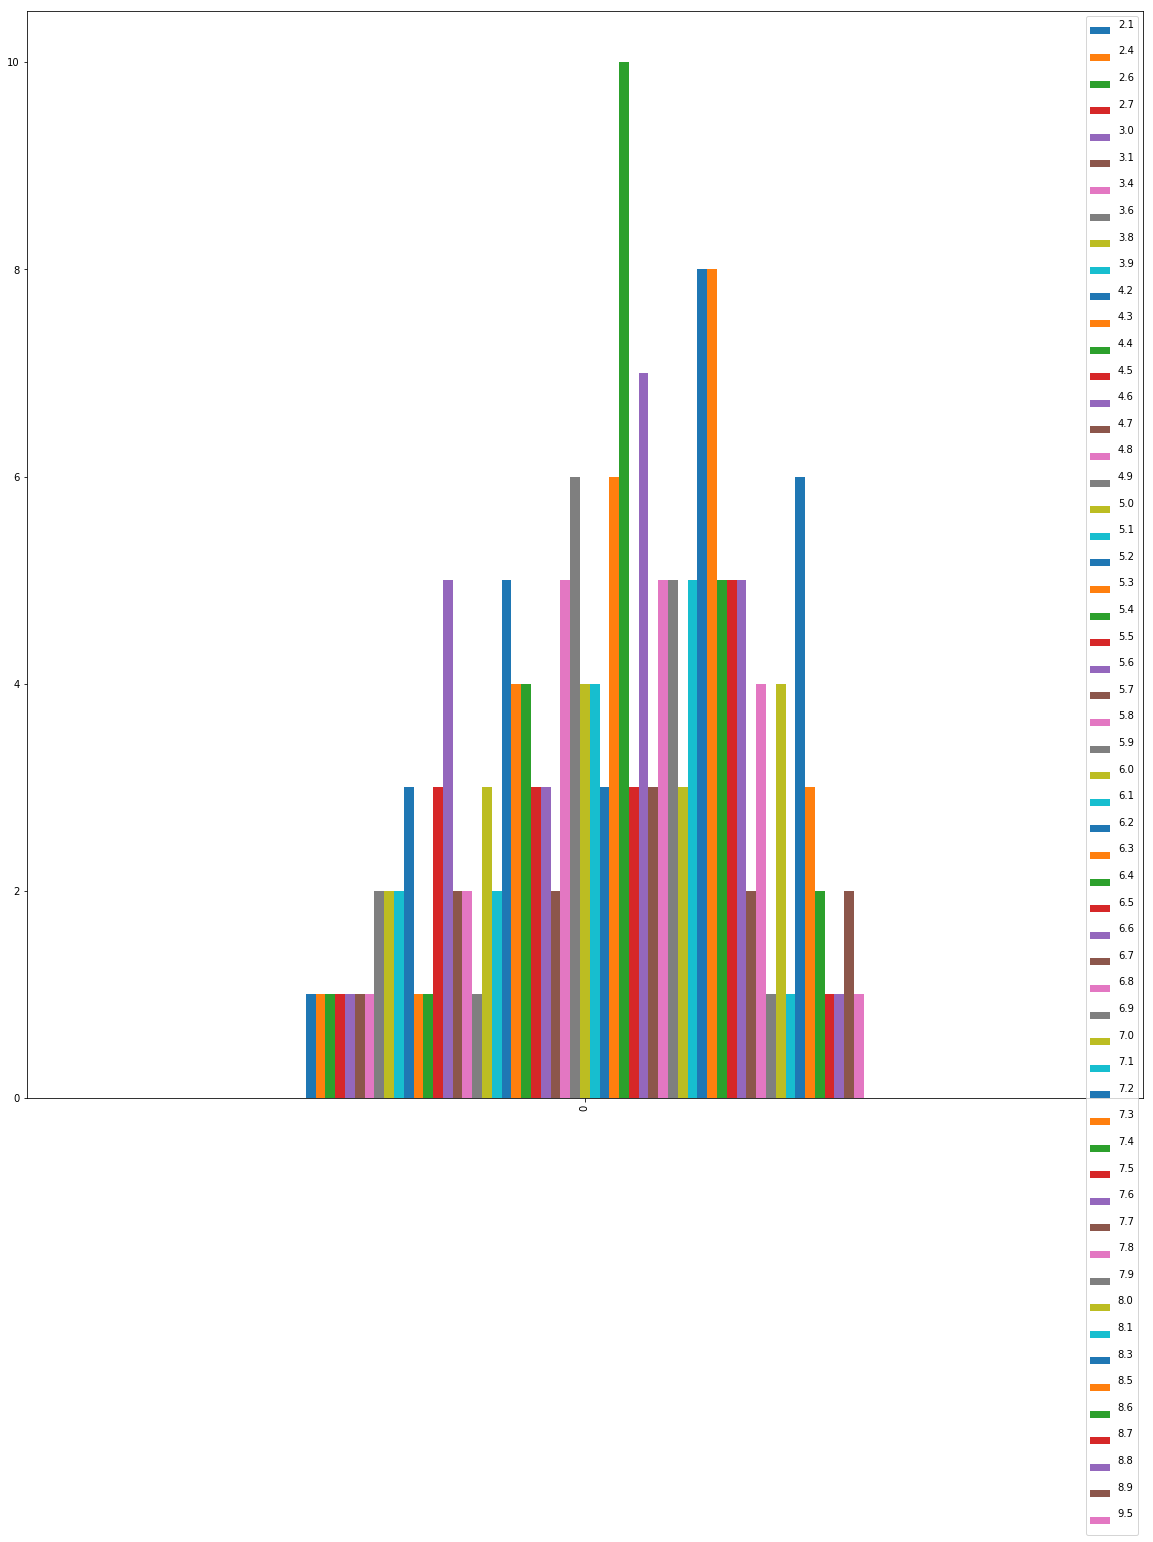

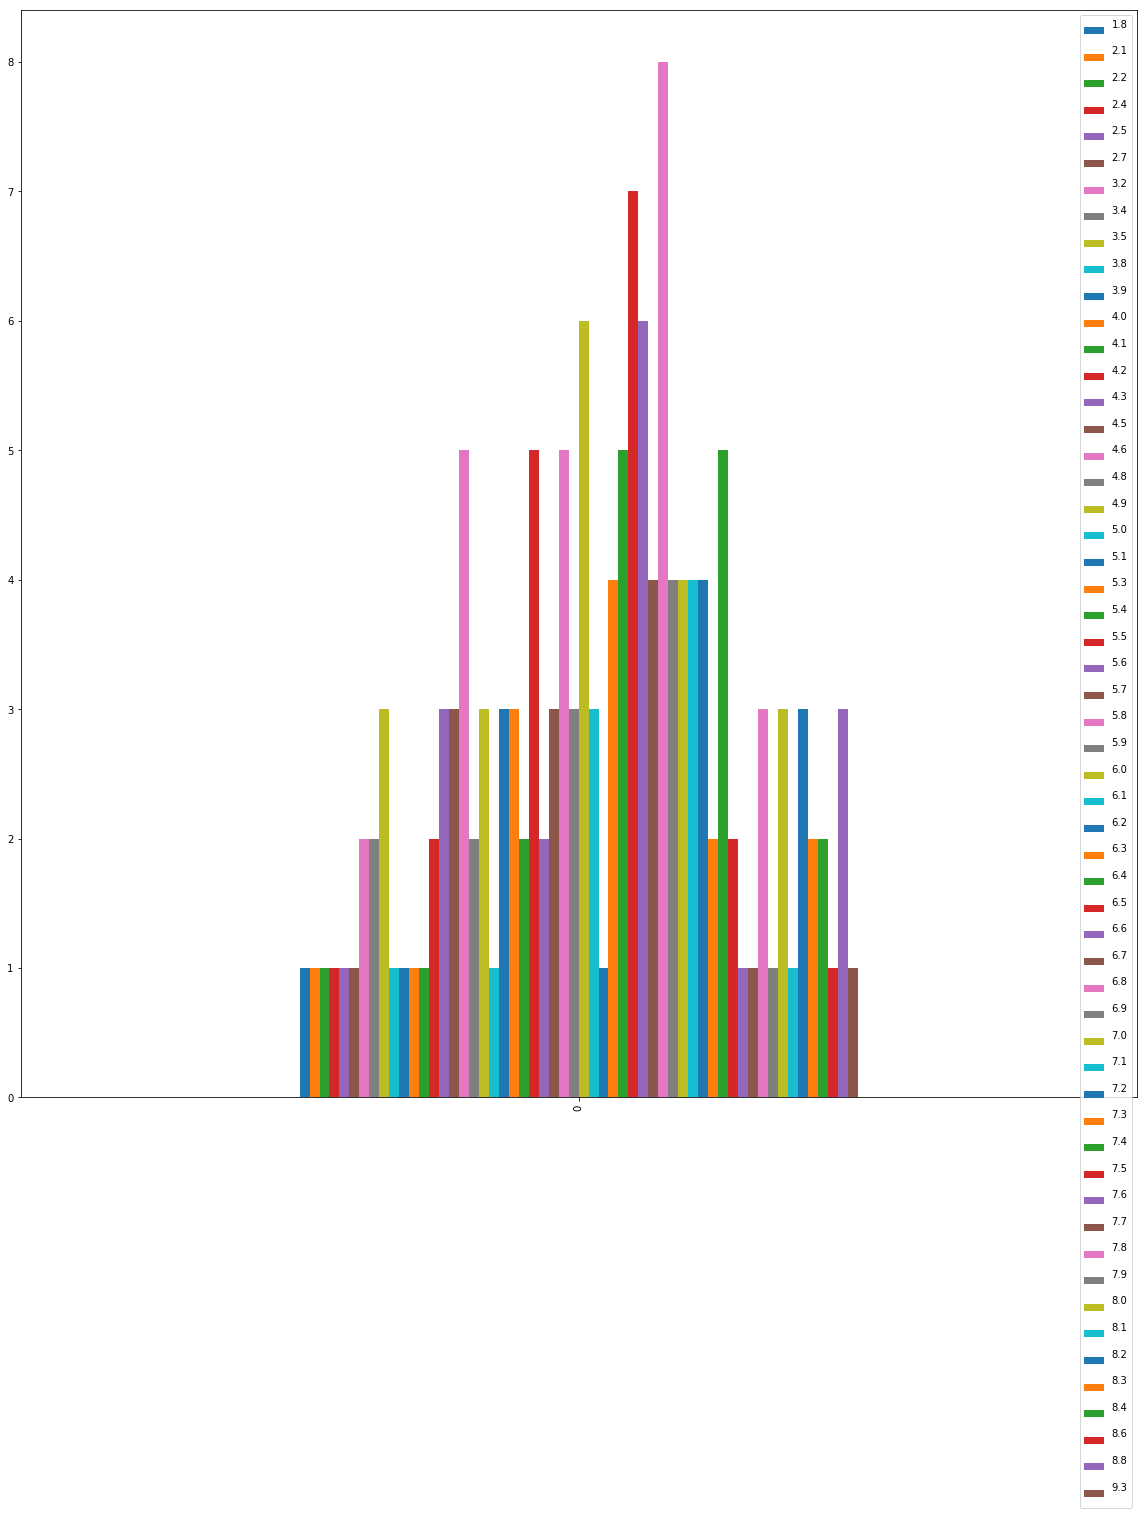

In [57]:
for i in index:
    b = (in_rating10[i].values())
    c = list(map(int,b))
    df = pd.DataFrame([in_rating10[i]])
    df.plot(kind = 'bar',figsize=(20,20))

In [58]:
for i in index:
    b = 0
    for j in in_rating10[i]:
        a = float(j.strip())
        b = b + a*(in_rating10[i][j])
    avg = b/sum(list(in_rating10[i].values()))
    print(avg)

5.934975369458128
6.306486486486488
6.073202614379086


## 11

In [197]:
#Bat
vn=[3210,9157,32064,10016,111779]
for i in vn:
    print(nu_movie[i])

ManofSteel2013
LoveandHonor2013
IntotheStorm2014
TheJusticeLeaguePartOne2017
Eloise2015


In [200]:
##2 MISSIONIMPOSSIBLE
vn=[37747,55767,66511,31539,31530]
for i in vn:
    print(nu_movie[i])

NowYouSeeMeTheSecondAct2016
BreakingtheBank2014
Suffragette2015
Phantom2015
Fan2015


In [202]:
##3 MINIONS
vn=['36225','59251','50577','16134','36219']
for i in vn:
    print(nu_movie[int(i)])

DespicableMe22013
SurfsUp2007
Up2009
InsideOut2015
TheLorax2012


## 12

In [71]:
nnu_id=dict()#give actor index return actor
for i in id_nu:
    nnu_id[id_nu[i]]=i

In [80]:
actor_page_rank=dict()
with open ("actor_page_rank.txt",'r') as apr:
    count=1
    for line in apr.readlines():
        if count % 2 == 1:
            i = str(line).strip()
            count+=1
        else:
            actor_page_rank[i]=line.strip()
            count+=1

In [159]:
f=open ('feature.txt','w')
t=open ('target.txt','w') 
for i in movie_nu:
    if i in movie_rating:
        if i != 'BatmanvSupermanDawnofJustice2016' or 'MissionImpossibleRogueNation2015' or 'Minions2015':
            a=movie_id[i]
            p=[]
            count=0
            for j in a[0:5]:
                p.append(actor_page_rank[str(id_nu[j])])
                count+=1
            ave=0    
            for j in a:
                ave+=float(actor_page_rank[str(id_nu[j])])
            ave=ave/len(a)
            f.write(str(movie_nu[i])+'\t\t'+str(p[0])+'\t\t'+str(p[1])+'\t\t'+str(p[2])+"\t\t"+str(p[3])+'\t\t'+str(p[4])+"\t\t"+str(ave)+'\n')
            t.write(str(movie_nu[i])+"\t\t"+movie_rating[i].strip()+'\n')
f.close()
t.close()

In [179]:
tf= open("feature.txt","r")
tt= open("target.txt","r")
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
ave=[]
tar=[]
for lines in tf.readlines():
    tokens=lines.split("\t\t")
    p1.append(float(tokens[1]))
    p2.append(float(tokens[2]))
    p3.append(float(tokens[3]))
    p4.append(float(tokens[4]))
    p5.append(float(tokens[5]))
    ave.append(float(tokens[6]))
    
for lines in tt.readlines():
    tokens=lines.split("\t\t")
    tar.append(float(tokens[1]))
    
X=[p1,p2,p3,p4,p5,ave]
X=py.asarray(X)
X=py.asarray(X).T
Y=[tar]
Y=py.asarray(tar)
Y=py.asarray(Y).T

In [180]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
test=[]
for i in m_t_r:
    
    a=movie_id[i]
    p=[]
    count=0
    for j in a[0:5]:
        p.append(float(actor_page_rank[str(id_nu[j])]))
        count+=1
    ave=0    
    for j in a:
        ave+=float(actor_page_rank[str(id_nu[j])])
    ave=ave/len(a)
    p.append(ave)
    
    test.append(p)

In [184]:
test=py.asarray(test)
result=lr.predict(test)

In [185]:
result

array([5.99480101, 6.00204717, 6.15973919])

In [192]:
scores=cross_validation.cross_val_score(lr,X,Y,cv=10, scoring='mean_squared_error')
rmse=math.sqrt(-py.mean(scores))
print(rmse)

D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring 

1.2387511207558064


D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
D:\jupyter\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


## 13

In [6]:
Bipartite = open("Bipartite.txt", "w") 
M=["BatmanvSuperman:DawnofJustice2016","MissionImpossibleRogueNation2015","Minions2015"]
n=0
for movie in list(movie_rating):
    if movie in M:
        continue
    if movie in list(movie_id):
        n=n+1
        if n>50000:
            break
        actors=movie_id[movie]
        le=len(actors)
        for actor in actors:
            actornos=actor.replace(' ','')
            Bipartite.write(actornos+"\t"+movie+"\n")
Bipartite.close()           

In [7]:
m1a=open("m1a.txt","w")
for actor in movie_id['BammaMaataBangaruBaata1990']:
    actornos=actor.replace(' ','')
    m1a.write(actornos+"\t")
m1a.write("\n")
m1a.close()
m2a=open("m2a.txt","w")
for actor in movie_id['MissionImpossibleRogueNation2015']:
    actornos=actor.replace(' ','')
    m2a.write(actornos+"\t")
m2a.write("\n")
m2a.close()
m3a=open("m3a.txt","w")
for actor in movie_id['Minions2015']:
    actornos=actor.replace(' ','')
    m3a.write(actornos+"\t")
m3a.write("\n")
m3a.close()

In [8]:
nm1=open("nm1.txt","r")
nm2=open("nm2.txt","r")
nm3=open("nm3.txt","r")
r1=0
ar1=0
n1=0
i1=0
r2=0
ar2=0
n2=0
i2=0
r3=0
ar3=0
n3=0
i3=0
with open("nm1.txt",errors="ignore") as nm1:
    for line in nm1:
        n1=n1+1
        movie=line.replace('\n','')
        if movie!='1':
            r1=r1+float(movie_rating[movie])
            
        else:
            ar1=ar1+r1/(n1-1)
            n1=0
            r1=0
            i1=i1+1
arr1=ar1/i1

with open("nm2.txt",errors="ignore") as nm2:
    for line in nm2:
        n2=n2+1
        movie=line.replace('\n','')
        if movie!='1':
            r2=r2+float(movie_rating[movie])
 
        else:
            ar2=ar2+r2/(n2-1)
            n2=0
            r2=0
            i2=i2+1


arr2=ar2/i2

with open("nm3.txt",errors="ignore") as nm3:
    for line in nm3:
        n3=n3+1
        movie=line.replace('\n','')
        if movie!='1':
            r3=r3+float(movie_rating[movie])
            
        else:
            ar3=ar3+r3/(n3-1)
            n3=0
            r3=0
            i3=i3+1


arr3=ar3/i3
print(arr1)       
print(arr2)   
print(arr3)   

6.35606590400733
6.472132623152901
6.820884004246073
